In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import shutil
import os
import cv2

In [2]:
# Read the augmented files
path_dst_aug = '/kaggle/input/augmented-images'

# Create a dataframe with the image_name, image, and class
list_classe = os.listdir(path_dst_aug)
df_a = pd.DataFrame(columns=['file_name', 'image', 'diag'])
for classe in list_classe:
    path = os.path.join(path_dst_aug, classe)
    list_images = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    print(f'{classe} = {len(list_images)}')
    for image_name in list_images:
        image = cv2.imread(os.path.join(path, image_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #ajout des données dans un dataframe
        df_a.loc[len(df_a.index)] = [image_name, image, classe]

N = 2816
H = 2859
M = 2926
G = 2903
A = 2889
O = 2591
C = 2772
D = 3048


In [1]:
# class stratification
size = 22795
stratified = df_a.groupby('diag', group_keys=False)\
                        .apply(lambda x: x.sample(int(np.rint(size*len(x)/len(df_a)))))\
                        .sample(frac=1).reset_index(drop=True)

NameError: name 'df_a' is not defined

In [4]:
pickle_file_path = '/kaggle/working/dataframe.pkl'
stratified.to_pickle(pickle_file_path)

In [6]:
stratified.head()

,file_name,image,diag
0,1216_right_0_2066.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",G
1,849_left_0_3653.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",H
2,2192_left_0_4669.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",C
3,4591_right_0_7959.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",H
4,4253_left_0_6894.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",N


In [7]:
dataB = pd.read_csv('/kaggle/input/tabulardata/df_eyes_bueno1.csv')

In [8]:
dataB.head()

,Unnamed: 0,Age,Sex,Fundus,Diag,ID,A,C,D,G,H,M,N,O
0,0,69,Female,0_left.jpg,C,0,False,True,False,False,False,False,False,False
1,1,69,Female,0_right.jpg,N,0,False,False,False,False,False,False,True,False
2,2,57,Male,1_left.jpg,N,1,False,False,False,False,False,False,True,False
3,3,57,Male,1_right.jpg,N,1,False,False,False,False,False,False,True,False
4,4,42,Male,2_right.jpg,D,2,False,False,True,False,False,False,False,False


In [15]:
# Create a new column in dataB that contains the common element in 'Fundus'
dataB['common_element'] = dataB['Fundus'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])
dataB['common_element'] = dataB['common_element'].apply(lambda x: x.split('.')[0])
# Create a new column in df_B that contains the common element in 'file_name'
stratified['common_element'] = stratified['file_name'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])

In [16]:
dataB.head()

,Unnamed: 0,Age,Sex,Fundus,Diag,ID,A,C,D,G,H,M,N,O,common_element
0,0,69,Female,0_left.jpg,C,0,False,True,False,False,False,False,False,False,0_left
1,1,69,Female,0_right.jpg,N,0,False,False,False,False,False,False,True,False,0_right
2,2,57,Male,1_left.jpg,N,1,False,False,False,False,False,False,True,False,1_left
3,3,57,Male,1_right.jpg,N,1,False,False,False,False,False,False,True,False,1_right
4,4,42,Male,2_right.jpg,D,2,False,False,True,False,False,False,False,False,2_right


In [14]:
stratified.head()

,file_name,image,diag,common_element
0,1216_right_0_2066.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",G,1216_right
1,849_left_0_3653.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",H,849_left
2,2192_left_0_4669.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",C,2192_left
3,4591_right_0_7959.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",H,4591_right
4,4253_left_0_6894.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",N,4253_left


In [17]:
#Merge the stratified and dataB on the common_element
merged_df = pd.merge(stratified, dataB[['common_element', 'Age', 'Sex']], on='common_element', how='left')
merged_df.head()

,file_name,image,diag,common_element,Age,Sex
0,1216_right_0_2066.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",G,1216_right,45,Male
1,849_left_0_3653.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",H,849_left,60,Female
2,2192_left_0_4669.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",C,2192_left,50,Female
3,4591_right_0_7959.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",H,4591_right,65,Male
4,4253_left_0_6894.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",N,4253_left,58,Male


In [20]:
merged_df.drop('common_element', axis=1, inplace=True)
merged_df

,file_name,image,diag,Age,Sex
0,1216_right_0_2066.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",G,45,Male
1,849_left_0_3653.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",H,60,Female
2,2192_left_0_4669.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",C,50,Female
3,4591_right_0_7959.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",H,65,Male
4,4253_left_0_6894.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",N,58,Male
...,...,...,...,...,...
22791,886_right_0_1121.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",A,65,Female
22792,1218_left_0_4627.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",G,68,Female
22793,2184_right_0_9989.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",C,65,Female
22794,2520_left_0_5435.png,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",N,69,Male


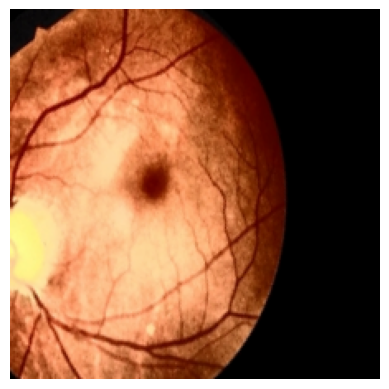

In [22]:
import matplotlib.pyplot as plt

plt.imshow(merged_df['image'][2200])
plt.axis('off')
plt.show()

In [23]:
pickle_file_path = '/kaggle/working/dataframe_bueno.pkl'
merged_df.to_pickle(pickle_file_path)

In [ ]:
#loaded_df = pd.read_pickle('/kaggle/working/dataframe.pkl')

In [24]:
#Images
X0 = np.array(list(merged_df.image))
y0 = np.array(list(merged_df.diag))
files = np.array(list(merged_df.file_name))

In [27]:
#Tabular data
X1 = np.array(list(merged_df.Age))
X2 = np.array(list(merged_df.Sex))

In [31]:
# Train and test
size = 22795
limit_train = int(size * 0.8)

X0_train = X0[:limit_train]
X0_test = X0[limit_train:]

X1_train = X1[:limit_train]
X1_test = X1[limit_train:]

X2_train = X2[:limit_train]
X2_test = X2[limit_train:]

files_train = files[:limit_train]
files_test = files[limit_train:]

y_train = y0[:limit_train]
y_test = y0[limit_train:]

In [35]:
# Save all the data
path_npy = '/kaggle/working/'
np.save(path_npy+'X0_train', X0_train)
np.save(path_npy+'X0_test', X0_test)
np.save(path_npy+'X1_train', X1_train)
np.save(path_npy+'X1_test', X1_test)
np.save(path_npy+'X2_train', X2_train)
np.save(path_npy+'X2_test', X2_test)
np.save(path_npy+'y_train', y_train)
np.save(path_npy+'y_test', y_test)
np.save(path_npy+'name_file_train', files_train)
np.save(path_npy+'name_file_test', files_test)